In [148]:
import numpy as np
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from numpy import linalg as lg
%matplotlib inline

### Проверим гипотезу о пороге перколяции и диаметре графа.

Пусть мы имеем граф Эрдеша-Реньи с N вершинами и вероятностью связи p. Диаметр графа $d = N * p$. 
Верно ли, что порог перколяции $\alpha$ ~ $\frac{1}{d}$?

1.Создадим 10 графов с разным числом вершин (от 500 до 5000)

In [14]:
N_arr = np.arange(500, 5001, 500)
p = 0.05
G_arr = [nx.erdos_renyi_graph(N, p) for N in N_arr]

In [16]:
nx.number_of_nodes(G_arr[9])

5000

2.Посчитаем порог перколяции для каждого графа

In [29]:
def getInfectedFractionModel2(G, numberSteps, thresholdInf, startNode):    
    inf = []
    susc = []
    
    inf_dict = defaultdict(list)
    
    cur_infected_node = startNode
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем всех неактивных соседей этой вершины
        not_infected_neighbors = []
        for j in list(nx.all_neighbors(G, cur_infected_node)):
            if j not in inf:
                not_infected_neighbors.append(j)
    
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            print("Exit")
            break
            
        if not_infected_neighbors:
            for elem in not_infected_neighbors:
                p = random.uniform(0, 1)
                if p < thresholdInf:
                    inf_dict[i].append(elem)
            
        #добавим в список зараженных новые вершины
        for j in inf_dict[i]:
            inf.append(j)
        
        if inf_dict[i]:
            inf.remove(cur_infected_node)
            cur_infected_node = random.choice(inf_dict[i])
            
    return inf

In [67]:
infection_array = []
prob_model2 = np.arange(0.00001, 0.1, 0.01)
for i in range(10):
    startNode = random.randint(1, nx.number_of_nodes(G_arr[i]))
    inf_arr_model2 = []
    for p in prob_model2:
        infected_arr = getInfectedFractionModel2(G_arr[i], 1000, p, startNode)
        inf_arr_model2.append(len(infected_arr) / nx.number_of_nodes(G_arr[i]))
    infection_array.append(inf_arr_model2)

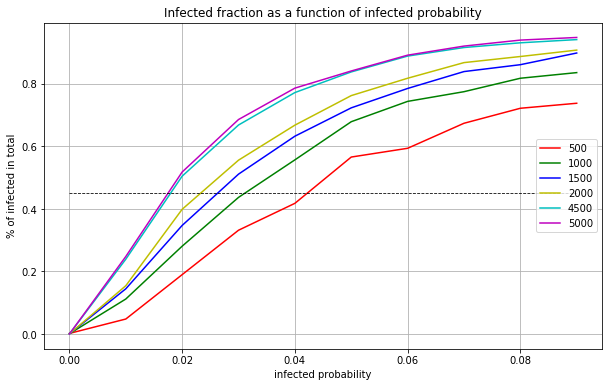

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(prob_model2, infection_array[0], 'r', linewidth=1.5, label='500')

ax.plot(prob_model2, infection_array[1], 'g', linewidth=1.5, label='1000')

ax.plot(prob_model2, infection_array[2], 'b', linewidth=1.5, label='1500')

ax.plot(prob_model2, infection_array[3], 'y', linewidth=1.5, label='2000')

ax.plot(prob_model2, infection_array[8], 'c', linewidth=1.5, label='4500')

ax.plot(prob_model2, infection_array[9], 'm', linewidth=1.5, label='5000')

ax.plot(prob_model2, np.full((len(prob_model2), 1), 0.45), 'k--', linewidth=0.8)

ax.grid(True)
ax.legend(loc='right')
ax.set_title('Infected fraction as a function of infected probability')
ax.set_xlabel('infected probability')
ax.set_ylabel('% of infected in total')

plt.show()

### Проверим гипотезу о пороге перколяции и максимальном собственном значении матрицы

Построим матрицу A смежности графа и вектор s зараженных вершин. Рассмотрим максимальное собственное значение $\lambda_{1}$ матрицы $sA^{n}$. Верно ли, что порог перколяции $\alpha$ ~ $\frac{1}{\lambda_{1}}$ ?

In [82]:
N = 1000
p = 0.05
G = nx.erdos_renyi_graph(N, p)

In [151]:
A = nx.adjacency_matrix(G)

In [152]:
A = A.todense()
A

matrix([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [153]:
A.shape

(1000, 1000)

In [158]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected_arr = getInfectedFractionModel2(G, 1000, 0.5, startNode)
inf_frac = len(infected_arr) / N
inf_frac

0.847

In [159]:
s = list(np.full(N, 0))
for i in infected_arr:
    del s[i]
    s.insert(i, 1)

In [160]:
ss = np.dot(s, A)

In [161]:
ss

matrix([[40, 47, 39, 43, 34, 38, 42, 41, 45, 33, 38, 46, 52, 49, 29, 42,
         49, 50, 40, 44, 36, 45, 48, 42, 37, 45, 25, 51, 43, 31, 46, 39,
         37, 48, 51, 44, 36, 44, 47, 50, 49, 44, 40, 37, 37, 35, 44, 47,
         50, 50, 54, 46, 50, 44, 49, 45, 56, 50, 65, 47, 50, 48, 49, 51,
         41, 47, 42, 45, 35, 55, 35, 49, 37, 42, 32, 37, 30, 41, 47, 39,
         40, 47, 45, 41, 54, 35, 37, 45, 41, 41, 54, 42, 51, 37, 48, 42,
         52, 57, 43, 37, 42, 59, 45, 43, 46, 38, 44, 37, 47, 37, 35, 44,
         36, 46, 43, 44, 42, 41, 46, 39, 46, 54, 53, 57, 38, 52, 38, 37,
         37, 32, 34, 45, 51, 46, 46, 43, 38, 65, 36, 51, 38, 48, 46, 45,
         42, 39, 44, 41, 49, 45, 39, 44, 39, 36, 42, 39, 42, 42, 34, 48,
         42, 37, 39, 53, 44, 28, 42, 40, 44, 32, 44, 36, 56, 33, 38, 36,
         38, 44, 41, 33, 49, 52, 40, 44, 45, 39, 52, 42, 36, 47, 40, 45,
         50, 40, 45, 40, 39, 36, 42, 35, 45, 37, 46, 29, 37, 38, 41, 56,
         35, 44, 44, 33, 53, 40, 44, 37, 39, 44, 47

In [163]:
matr = np.dot(s, lg.matrix_power(A, 5))

LinAlgError: Last 2 dimensions of the array must be square

In [167]:
w, v = lg.eig(lg.matrix_power(A, 5))

In [185]:
list(w)[-1]

344667231.5306965

In [191]:
s = list(np.full(N, 0))
del s[907]
s.insert(907, 1)
np.dot(s, A)

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [199]:
A_ex = [[0, 1, 0, 0, 1],[1, 0, 0, 1, 0],[0, 0, 0, 0, 0],[0, 1, 0, 0, 1],[1, 0, 0, 1, 0]]
s_ex = [0, 1, 0, 0, 0]
s2 = np.dot(s_ex, A_ex)
s3 = np.dot(s2, A_ex)
print(s3)

[0 2 0 0 2]


In [200]:
np.dot(s_ex, lg.matrix_power(A_ex, 2))

array([0, 2, 0, 0, 2])

In [202]:
np.dot(s, lg.matrix_power(A, 100))

matrix([[ 4972824633949739300,  -794046865500708832,
         -4149077731673357202, -7780148039953224766,
         -6258555446240315234,   701194781697242789,
         -2936893163632199263,  2472252589502984206,
         -3245132801617277990, -9176831156039190031,
          5704337164360920711,  5718640977191640008,
         -6276916680514081641,  2352951967119733839,
         -4021962059458632234, -1277875639430155532,
         -6679521189887974039, -3234123535205490554,
          1212267999660422704, -6022885862265084670,
          1108776687165402946, -6035331868483199498,
         -5541537222296767927,  8967630411070121535,
          -556641037678037063, -6764863221304961645,
          2370883438537256913,  7783382577055170527,
          2437071851548968849,  7639699784260573343,
          4783247804394205275, -8108617162412651983,
         -6508161714319150112,  -198018132986953398,
         -8342444423839333178, -3282951792557829888,
         -5607644771908883703, -70726128812552

In [209]:
lg.matrix_power(A, 10)

KeyboardInterrupt: 

In [254]:
G = nx.erdos_renyi_graph(1000, 0.005)
A = nx.adjacency_matrix(G)

In [255]:
nx.number_of_edges(G)

2573

In [256]:
np.dot(s, lg.matrix_power(A.todense(), 100))

matrix([[  961009806495492409, -8189844860392591124,
          6356606315566191888,  8469724940618873481,
          1290364780012601816,   817948522291358743,
          -324865831754480182, -3928162158928229017,
          8519476404454901707,  8550656788820991771,
           421531177984649601,  7583942522283588132,
         -1664911812772185511, -6911809894496090659,
          3265747751416917554,  3510090004839758672,
          3163753688319319629,  6924775248681334973,
          2503938238818686000,  6221779541170780112,
          6971292072274440473,  7246889940789017746,
          1105480729741973810,   225247520098385690,
           757521478246657183,  2744155523933847675,
          1312433380962327535,  6098029406452918552,
          7188350066875255706,  2919820663501930497,
          4853404919102685315,  4372595064690554413,
          4724627661708508433, -1139274246686813144,
          7745686183076283753,  9009169399909647659,
         -8578452005879815739,  67800340761904

In [274]:
ss = np.dot(s, A.todense())
for i in range(100):
    ss = np.dot(ss, A.todense())
ss

matrix([[  651808871421836872, -3580112213015468931,
         -2299751198478962154,  2690348636641726417,
           -85770880307104874,  2350211299672708335,
          -801055555861918407,  6671563888206433941,
          6727785845698743130,  -195950404227411853,
         -6348931317635595976,  5324807646111706279,
          4246567951512256907,  7494268655712852819,
          5324477736767341585, -4785579292334304444,
          3869811265323095814,  3547818508740145527,
          3556978223411074765,  3058621938822892404,
         -2336225320530049818, -4970887370030660847,
         -2248994673241691388, -1641201789688666062,
          2805387346136900021,  7621601304511728281,
          1562891573688248676,  8188822853478146337,
         -4838505080011399634,  5513424966195043473,
         -3307687506325710826, -3153311688445361625,
         -4032547998928378404, -7248714238099144710,
            97899341373648051, -4054445076613518617,
          6793367077660537039, -22794043447410